In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc
import scipy.stats as ss

Inserindo medições

In [33]:
distancias = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
afastamento = [1446, 1190, 910, 602, 444, 310, 227, 185, 160, 128, 111, 92, 83, 71]
aproximacao = [1507, 1320, 920, 585, 433, 320, 232, 200, 160, 137, 104, 98, 83, 71]


Cálculo de média e divisão das medições por 100

In [34]:
media = []   #10*3
ap = []
af = []

for c in range( len(distancias) ):
    media.append(  round((aproximacao[c] + afastamento[c])/200, 5) )
    ap.append(round(aproximacao[c]/100, 5))
    af.append(round(afastamento[c]/100, 5))

Criando tabela

In [51]:
data = {

    'Distância relativa fonte-sensor (cm)': distancias,
    'Intensidade 1 (lux) Aproximação [10^2]': ap,
    'Intensidade 1 (lux) Afastamento [10^2]': af, 
    'Intensidade média (lux) [10^2]': media

}

In [52]:
df = pd.DataFrame(data, dtype = 'float64').round(3)


In [53]:
display(df)

,Distância relativa fonte-sensor (cm),Intensidade 1 (lux) Aproximação [10^2],Intensidade 1 (lux) Afastamento [10^2],Intensidade média (lux) [10^2]
0,4.0,15.07,14.46,14.765
1,6.0,13.20,11.90,12.550
2,8.0,9.20,9.10,9.150
3,10.0,5.85,6.02,5.935
4,12.0,4.33,4.44,4.385
5,14.0,3.20,3.10,3.150
6,16.0,2.32,2.27,2.295
7,18.0,2.00,1.85,1.925
8,20.0,1.60,1.60,1.600
9,22.0,1.37,1.28,1.325


Lei do inverso do quadrado da distância

In [38]:
def I(r):
    return 1/r**2

Ajustando o modelo

In [59]:
def exponential(x, a, k):
    return a*x**k 

popt_exponential_media, pcov_exponential_media = sc.curve_fit(exponential, distancias, media, p0=[1,-0.5])
popt_exponential_af, pcov_exponential_media = sc.curve_fit(exponential, distancias, af, p0=[1,-0.5])
popt_exponential_ap, pcov_exponential_media = sc.curve_fit(exponential, distancias, ap, p0=[1,-0.5])

Cálculo de R^2

In [40]:
slope, intercept, r_value, p_value, std_err = ss.linregress(distancias, media)
r_squared = r_value**2

Definição dos pontos a, k da equação y = a*x^k

In [41]:
a_m, k_m = popt_exponential_media[0], popt_exponential_media[1]
a_af, k_af = popt_exponential_af[0], popt_exponential_af[1]
a_ap, k_ap = popt_exponential_ap[0], popt_exponential_ap[1]

Definindo a variação do eixo x

In [48]:
x = np.arange(2, distancias[ (len(distancias)) - 1 ], 0.01)

Plotando o gráfico

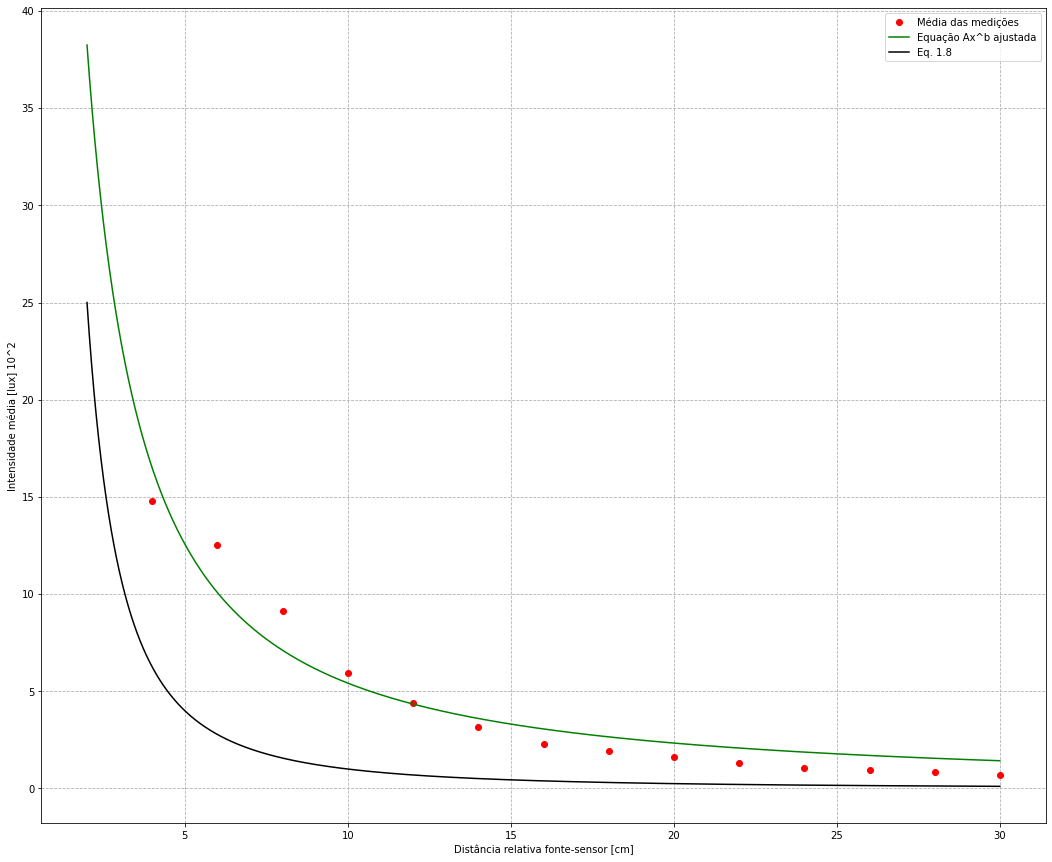

In [56]:
plt.figure(figsize=((18,15)))

plt.plot(distancias, media, 'yo', color = 'red', label='Média das medições')
#plt.plot(distancias, af, 'yo', color = 'brown', label='Medições afastamento')
#plt.plot(distancias, ap, 'yo', color = 'blue', label='Medições aproximação')

plt.plot(x, exponential(x, a_m, k_m), color = 'green', label='Equação Ax^b ajustada')
#plt.plot(x, exponential(x, a_ap, k_ap), color = 'blue', label='Ajustada aproximação')
#plt.plot(x, exponential(x, a_af, k_af), color = 'gray', label='Ajustada afastamento')
plt.plot(x, I(r=x)*10**2, color = 'black', label = 'Eq. 2.8')

plt.grid(ls='--')
plt.legend()
plt.ylabel('Intensidade média [lux] 10^2')
plt.xlabel('Distância relativa fonte-sensor [cm]')


plt.show()

In [58]:
print('A: {:.3f}' .format(a_m))
print('b: {:.3f}' .format(k_m))
print('R^2: {:.3f}' .format(r_squared))

A: 88.730
b: -1.214
R^2: 0.766
